In [49]:
#importing required libraries & dataset for the project
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
!pip install fuzzy-c-means
from fcmeans import FCM
%pip install matplotlib


data = pd.read_csv("./dataseet.csv")   #importing files using pandas


data.shape


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(3642, 7)

In [4]:
data.head(5)    #shows top 5 dataset items

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1


In [5]:
X = data.iloc[:, [ 0,1, 2, 3, 5]].values
Y = data.iloc[:, 6].values
X
Y

array([0, 0, 0, ..., 0, 1, 0])

In [76]:
kmeans = KMeans(n_clusters=5,random_state=3) 
kmeans.fit(X)
kmeans.cluster_centers_



array([[  7.9903485 ,  10.82922556,   1.21148112,   0.62497386,
         18.07268187],
       [  6.58857143,  76.60857143,   1.19964286,   0.89767857,
         20.90447   ],
       [  9.58333333, 259.55      ,   3.23333333,   1.624     ,
         26.646451  ],
       [  8.25170517,   3.34180176,   1.13887022,   0.92169677,
         15.3839832 ],
       [  7.41319797,  28.60152284,   1.41451777,   0.72106091,
         19.61897059]])

Text(0, 0.5, 'Spending Score (1-100)')

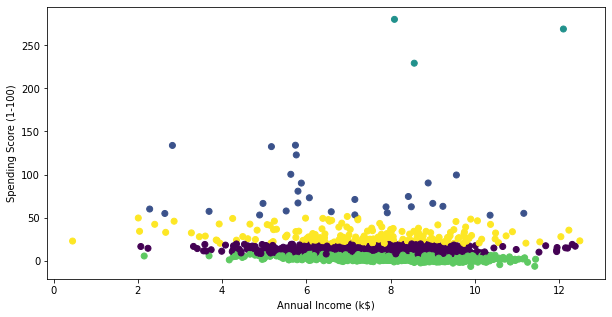

In [77]:
# ploting the graph
plt.figure(figsize=(10,5))
scatter = plt.scatter(x= data.iloc[:, 0], y=data.iloc[:, 1], c= kmeans.labels_)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')


In [78]:
labels = kmeans.labels_
True_labels = sum(Y == labels)
accuracy=True_labels/float(Y.size)*100
print("Accuracy is :",accuracy)

Accuracy is : 6.452498627127952


In [45]:
#Plotting the resualt
import matplotlib.pyplot as plt
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = labels 
#plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')
#plt.title('K-Means for Dataset")
plt.show()

In [81]:
fcm=FCM(n_clusters=5,random_state=19,max_iter=100,m=1.5)
fcm.fit(X)
pred_fcm = fcm.soft_predict(X)       #get membership values
pred_fcm  


array([[3.85948903e-03, 6.95221759e-08, 1.15793826e-05, 9.77809461e-01,
        1.83194012e-02],
       [7.62136097e-06, 9.85408952e-10, 1.05711429e-07, 7.13116732e-04,
        9.99279155e-01],
       [3.77971801e-04, 3.25984810e-08, 3.90782946e-06, 6.70208410e-02,
        9.32597247e-01],
       ...,
       [2.08408511e-04, 2.84695457e-08, 3.04420021e-06, 1.27839164e-02,
        9.87004602e-01],
       [1.57878412e-04, 1.40242766e-08, 1.65410338e-06, 3.87532456e-02,
        9.61087208e-01],
       [8.52636377e-06, 1.17462099e-09, 1.24005750e-07, 6.80154110e-04,
        9.99311194e-01]])

In [39]:
def alpha_cut(alpha,fuzz_val):
  labels=[]
  memberships=len(fuzz_val)
  for i in range(memberships):
    if (alpha>fuzz_val[i][0]):
      labels.append(1)
    else:
      labels.append(0)
  return labels
labels  

array([0, 3, 3, ..., 3, 3, 3], dtype=int32)

In [40]:
predictied=alpha_cut(.2,pred_fcm)
True_labels = sum(Y== predictied)
Accuracy_To_FCM=True_labels/float(Y.size)*100

print("Accuracy_score :",Accuracy_To_FCM)

Accuracy_score : 44.590884129599125
